# Beautiful Soup

In [1]:
import requests
from bs4 import BeautifulSoup

In [ ]:
response = requests.get('https://www.site.html')

content = response.content

site = BeautifulSoup(content, 'html.parser')

h1 = site.find('h1')
h2 = site.find('h2')
p = site.findAll('p')

def paragrafos():
    texto = '' # Cria uma variável para armazenar o texto
    for x in p:
        texto += x.text + '\n' # concatene o texto de cada parágrafo à variável.
    return texto # retorne o texto concatenado.

ps = paragrafos()

# Verifique se h2 não é None antes de acessar seu atributo de texto.
if h2:
    textofinal = h1.text + '\n' + h2.text + '\n' + ps
else:
    textofinal = h1.text + '\n' + ps # Use apenas h1 e ps se h2 for None.

variavel_noticia = textofinal

print(variavel_noticia)

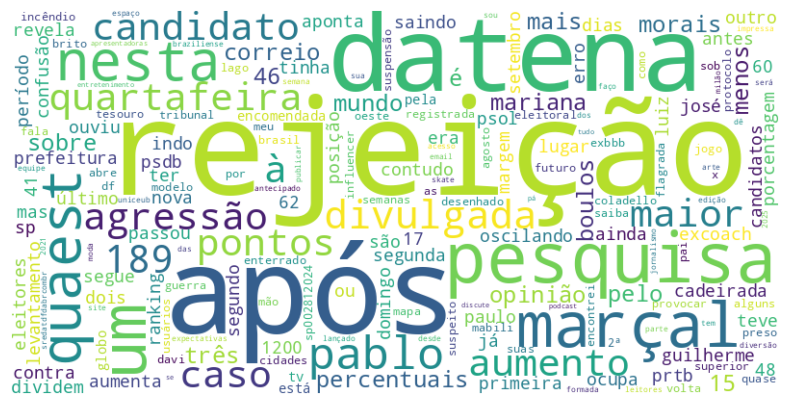

[('rejeição', 6),
 ('após', 5),
 ('datena', 5),
 ('pesquisa', 5),
 ('marçal', 4),
 ('um', 4),
 ('quaest', 3),
 ('nesta', 3),
 ('pablo', 2),
 ('divulgada', 2)]

In [5]:
# Vamos criar uma função para analisar o texto e extrair os itens necessários

from collections import Counter
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto fornecido para análise
text = variavel_noticia

# Limpando o texto, removendo pontuações e transformando para lowercase
clean_text = re.sub(r'[^\w\s]', '', text.lower())

# Separando as palavras
words = clean_text.split()

# Contando a frequência das palavras
word_counts = Counter(words)

# Filtrando palavras irrelevantes (artigos, preposições, etc.)
stopwords = ['a', 'de', 'o', 'para', 'e', 'em', 'com', 'que', 'os', 'do', 'da', 'na', 'no', 'uma', 'entre']
filtered_words = [word for word in words if word not in stopwords]

# Contando novamente sem as stopwords
filtered_word_counts = Counter(filtered_words)

# Pegando as 10 palavras mais comuns
top_10_words = filtered_word_counts.most_common(10)

# Criando uma nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_counts)

# Plotando a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Exibindo os 10 termos mais comuns
top_10_words


# Openai

In [ ]:
pip install openai==0.28

In [ ]:
!pip install load_dotenv

In [11]:
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # Ler o arquivo .env local.

openai.api_key  = ('OPENAI_API_KEY')

In [9]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # Este é o grau de aleatoriedade da saída do modelo.
    )
    return response.choices[0].message["content"]

In [ ]:
prompt = f"""
Faça uma análise do conteúdo da variavel_noticia e entregue como resultado uma tabela que identifique os seguintes itens:
- O alvo ou objeto principal da notícia
- Nuvem de palavras com os 10 termos mais predominantes na notícia
- O sentimento predominante da notícia (muito positivo, positivo, neutro, negativo, muito negativo)
- Emoção (A linguagem utilizada no texto é objetiva ou carregada de emoções, adjetivos fortes e julgamentos de valor?)
- Generalizações (A notícia utiliza generalizações excessivas ou estereótipos?)
- Escolha de Palavras (As palavras escolhidas têm conotação positiva ou negativa?)
- Tons Irônicos (A notícia utiliza ironia ou sarcasmo para ridicularizar determinada posição?)
- Foco (Qual é o foco principal da notícia? Há outros ângulos possíveis que estão sendo ignorados?)
- Contexto (A notícia apresenta o contexto completo do acontecimento ou seleciona apenas os fatos que corroboram uma determinada narrativa?)
- Causalidade (A notícia estabelece relações de causa e efeito de forma clara e fundamentada?)
- Contra-argumentos (A notícia apresenta os contra-argumentos de forma equilibrada ou os minimiza?)
- Intenção do Autor (Propósito: Qual é o objetivo da notícia? Informar, persuadir ou manipular?)
- Viés (A notícia apresenta um viés ideológico claro e visível?)
- A narrativa que o artigo está tentando entregar ao leitor

Texto da notícia: '''{variavel_noticia}'''
"""
response = get_completion(prompt)
print(response)